# **Data Analysis of Socioeconomic Determinants Using Python**

 This project showcases the usage of different **Python** librares such as **Pandas**, **NumPy**, **Scikit Learn**, **Seaborn** and **Matplotlib** for data analysis purposes.

In [1]:
# Importing the necessary python libraries to start the data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/content/drive/MyDrive/Dataset/life_expectancy.csv'
df = pd.read_csv(path)
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


# **1. Data Cleaning and Preprocessing**

In [ ]:
# Check missing values
df.isnull().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
Year,0
Life Expectancy World Bank,188
Prevelance of Undernourishment,684
CO2,152
Health Expenditure %,180
Education Expenditure %,1090


# **Missing Values**

* Printing missing values creating a new variable is much more efficient and readable. So the code in the cell below prints only those columns that have missing values instead of the whole dataset.

In [ ]:
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Display the result
print(missing_values)

Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
dtype: int64


# **Percentage of Missing Values**

* The code below prints the percentage of missing values in each of the columns that have missing values. This is really helpful in determining how to deal with each variable/column separately and see which imputation technique would work best. Whether a column requires imputation or would you want to remove it from the analysis.

In [ ]:
# Calculate percentage of missing values
percentage_missing = (missing_values / len(df)) * 100

# Display the result
print(percentage_missing)

Life Expectancy World Bank         5.686630
Prevelance of Undernourishment    20.689655
CO2                                4.597701
Health Expenditure %               5.444646
Education Expenditure %           32.970357
Unemployment                       9.195402
Corruption                        70.508167
Sanitation                        37.719298
dtype: float64


# **Imputing Missing Values**

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

def impute_missing(df, column):
  """Imputes missing values using mean or median based on normality.

  Args:
    df: The pandas DataFrame.
    column: The column name with missing values.

  Returns:
    The DataFrame with imputed values.
  """
  # Check for normality using Shapiro-Wilk test
  _, p_value = stats.shapiro(df[column].dropna())

  # Impute with mean if data is normally distributed (p > 0.05)
  if p_value > 0.05:
    imputation_value = df[column].mean()
    print(f"Imputing {column} with mean: {imputation_value}")
  # Impute with median otherwise
  else:
    imputation_value = df[column].median()
    print(f"Imputing {column} with median: {imputation_value}")

  df[column] = df[column].fillna(imputation_value)
  return df

# Columns to impute
columns_to_impute = ['Life Expectancy World Bank', 'CO2', 'Health Expenditure %', 'Unemployment']

# Apply imputation to each column
for column in columns_to_impute:
  df = impute_missing(df, column)

# Create a copy of the original DataFrame
imputed_df = df.copy()

# Columns to impute
columns_to_impute = ['Life Expectancy World Bank', 'CO2', 'Health Expenditure %', 'Unemployment']

# Apply imputation to the copied DataFrame
for column in columns_to_impute:
    imputed_df = impute_missing(imputed_df, column)

Imputing Life Expectancy World Bank with median: 72.1685
Imputing CO2 with median: 10204.999923706051
Imputing Health Expenditure % with median: 5.89235234
Imputing Unemployment with median: 5.92000007629395
Imputing Life Expectancy World Bank with median: 72.1685
Imputing CO2 with median: 10204.999923706051
Imputing Health Expenditure % with median: 5.89235234
Imputing Unemployment with median: 5.92000007629395


In [3]:
# Removing the corruption column as it has too much missing data
imputed_df = imputed_df.drop('Corruption', axis=1)

In [4]:
imputed_df.isnull().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
Year,0
Life Expectancy World Bank,0
Prevelance of Undernourishment,684
CO2,0
Health Expenditure %,0
Education Expenditure %,1090


In [5]:
from sklearn.impute import KNNImputer

# Create a KNNImputer object with desired parameters (e.g., k=5)
imputer = KNNImputer(n_neighbors=5)

# Select the columns to impute
columns_to_impute = ['Prevelance of Undernourishment', 'Sanitation', 'Education Expenditure %']

# Impute the missing values using KNN
imputed_df[columns_to_impute] = imputer.fit_transform(imputed_df[columns_to_impute])

# Export the final DataFrame to a CSV file
imputed_df.to_csv('final_life_expectancy_dataset.csv', index=False)

# **Dealing with Missing Values**

So, there were multiple columns in my dataset that had missing values. Corruption had a staggering of approximately 71% missing data. This column was dropped completely.

Other columns include **Life Expectancy World Bank**, **Prevelance of Undernourishment**, **CO2**, **Health Expenditure %**, **Education Expenditure %**, **Unemployment**, and **Sanitation** were all imputed using  mean/median imputation as well as the **KNN Imputation** technique.

**Life Expectancy World Bank**, **CO2**, **Health Expenditure %**, **Unemployment** were imputed using the mean/median imputation approach. Since the missingness is relatively small, these simple techniques are less likely to significantly distort the overall distribution. Choose mean if the data is normally distributed, otherwise, use the median.

**Prevelance of Undernourishment**, **Sanitation** and **Education Expenditure %** were imputed using **KNN Imputation**. These techniques can better estimate missing values while capturing relationships with other variables. KNN can capture complex patterns, while Regression assumes a linear relationship with other predictors.

So, the newly created df was then saved to a separate csv file and the original is intact in its raw form. It is always wise to keep the raw dataset intact in it's original form. If one makes any mistakes in the new dataset, you can always refer back to the original.

#**2. Exploratory Data Analysis (EDA) & Data Visualization**

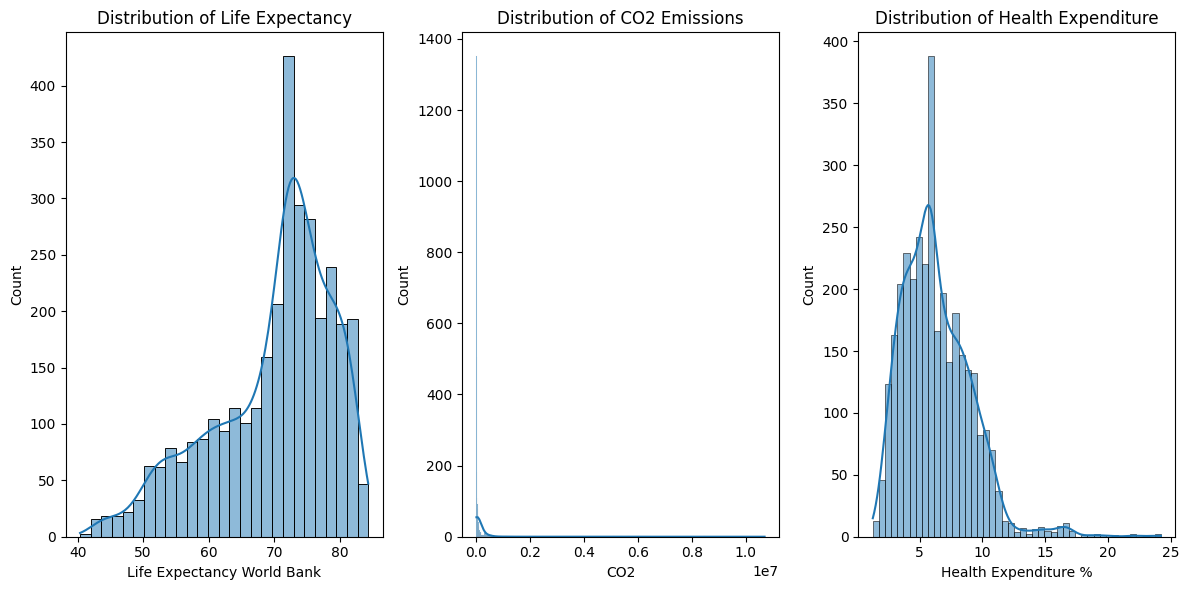

In [ ]:
# Creating histograms to visualize the distribution of numerical variables like LifeExpectancy, CO2, and HealthExpenditure.

plt.figure(figsize=(12, 6))  # Adjust figure size if needed

plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.histplot(imputed_df['Life Expectancy World Bank'], kde=True)
plt.title('Distribution of Life Expectancy')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.histplot(imputed_df['CO2'], kde=True)
plt.title('Distribution of CO2 Emissions')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.histplot(imputed_df['Health Expenditure %'], kde=True)
plt.title('Distribution of Health Expenditure')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Insight**

**Histogram 1: Distribution of Life Expectancy**

* Shape: The distribution appears to be roughly bell-shaped, with a slight skew to the left. This suggests that the majority of countries have a life expectancy clustered around the mean (which seems to be in the 70s), with a tail extending towards lower life expectancies.

* Center: The peak of the histogram indicates the mode, which represents the most frequent life expectancy range.

* Spread: The spread of the histogram gives us an idea of the variability in life expectancies. A wider spread would suggest greater differences in life expectancies across countries.

**Histogram 2: Distribution of CO2 Emissions**

* Shape: This histogram displays a heavily right-skewed distribution. This implies that a small number of countries have very high CO2 emissions, pulling the tail of the distribution to the right. Most countries likely have lower CO2 emissions clustered towards the left side of the graph.

* Center: The mode in this case would represent the most common range of CO2 emissions, likely falling towards the lower end.

* Spread: The long tail to the right indicates a large spread, suggesting substantial variation in CO2 emissions among countries.

**Histogram 3: Distribution of Health Expenditure**

* Shape: This histogram also exhibits a right-skewed distribution. This means that while many countries have lower health expenditures, a few countries spend significantly more, creating the tail on the right.

* Center: The mode would represent the most frequent range of health expenditure, likely located towards the lower end.

* Spread: The spread is considerable due to the tail, indicating a wide range of health expenditure percentages across countries.

**Overall Observations:**

* It's interesting to note that both CO2 emissions and health expenditure show right-skewed distributions, suggesting that a small proportion of countries have a disproportionately large impact or investment in these areas.

* The life expectancy histogram, being more bell-shaped, suggests a more even distribution of life expectancies across countries.

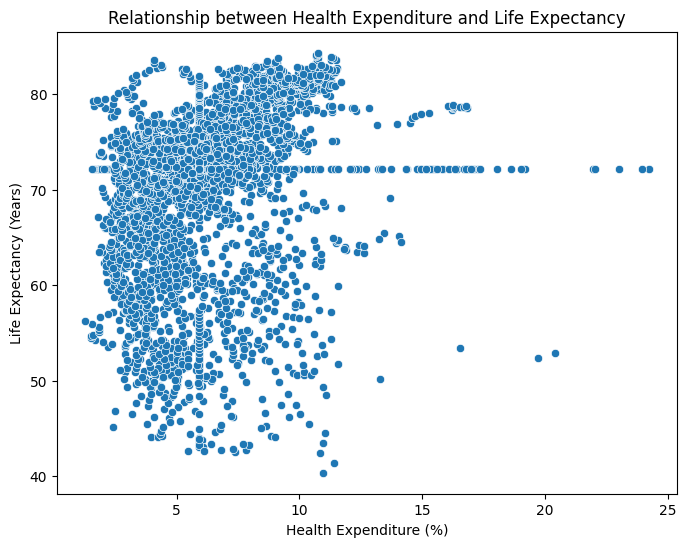

In [ ]:
# Creating scatter plots for Health Expenditure and Life Expectancy
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='Health Expenditure %', y='Life Expectancy World Bank', data=imputed_df)
plt.title('Relationship between Health Expenditure and Life Expectancy')
plt.xlabel('Health Expenditure (%)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

**Insight**

* At first glance, the scatterplot seems to suggest a very weak positive relationship between Health Expenditure and Life Expectancy. As Health Expenditure increases along the x-axis, there is a slight tendency for Life Expectancy to increase on the y-axis. However, this trend is not very pronounced, and there is substantial scatter of points throughout the plot.

**Key Observations**

* Clustering: A significant cluster of points is concentrated towards the lower end of Health Expenditure and mid-range Life Expectancy. This suggests that many countries achieve a decent life expectancy without extremely high health expenditures.

* Outliers: There are a few outliers with very high Health Expenditure but without correspondingly high Life Expectancy. This might indicate that increased spending doesn't always translate directly into longer lifespans, and other factors could be at play.

* Spread: The considerable spread of points across the entire plot highlights the variability in both Health Expenditure and Life Expectancy among different countries.

**Possible Explanations for Weak Trend:**

* Diminishing Returns: It's possible that beyond a certain level, additional health expenditure yields diminishing returns in terms of life expectancy. Other factors like socioeconomic conditions, lifestyle choices, and access to basic healthcare might play a more significant role.

* Data Limitations: The scatterplot might not capture all the relevant factors influencing life expectancy, such as education, nutrition, and environmental factors.

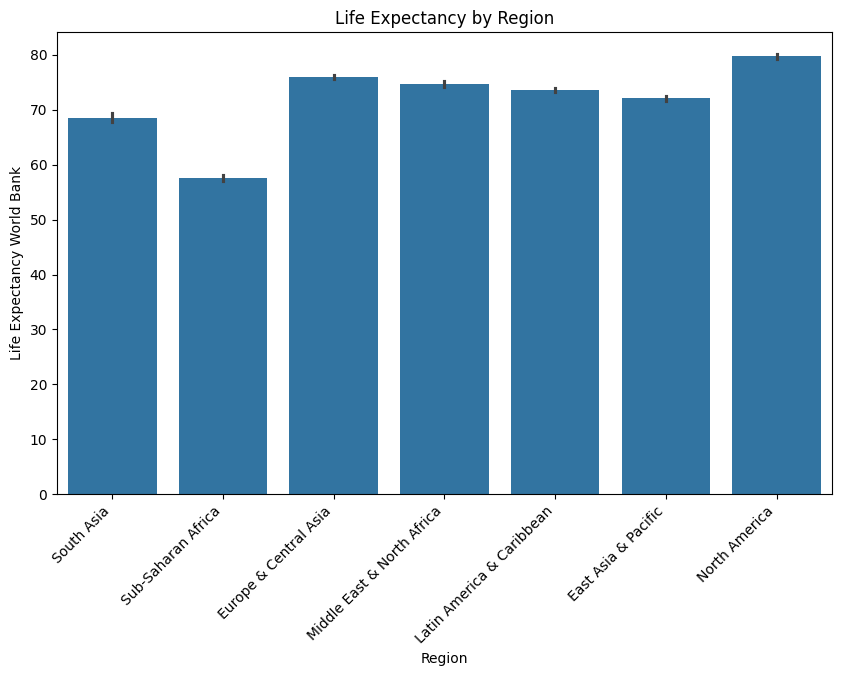

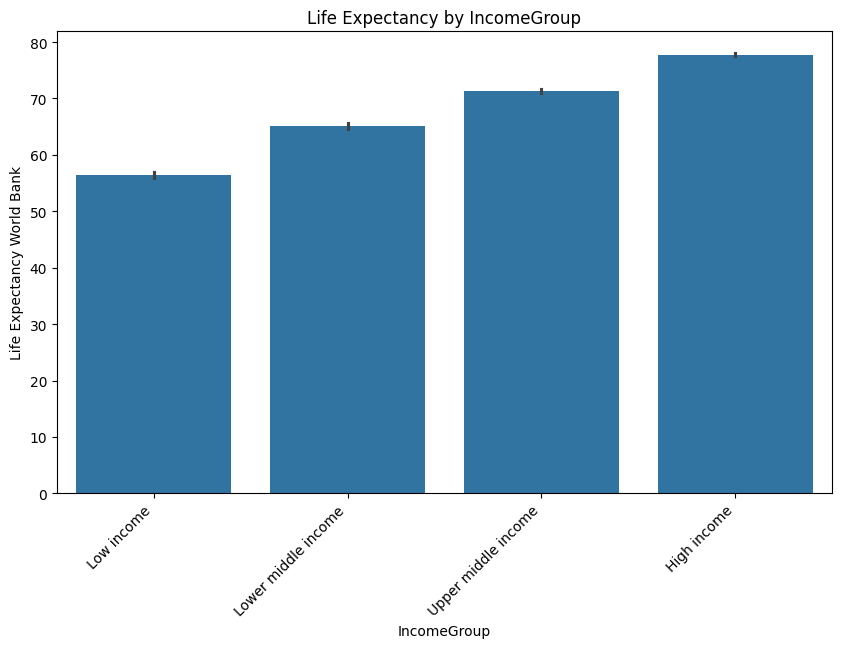

In [ ]:
# Creating barcharts Life Expectancy by Region
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='Region', y='Life Expectancy World Bank', data=imputed_df)
plt.title('Life Expectancy by Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

# Bar chart for Life Expectancy by IncomeGroup
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='IncomeGroup', y='Life Expectancy World Bank', data=imputed_df)
plt.title('Life Expectancy by IncomeGroup')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

**Insight**

* The first bar chart illustrates variations in average life expectancy across different regions. North America boasts the highest life expectancy, exceeding 80 years, while Sub-Saharan Africa reports the lowest, around 58 years. There is considerable variation between the remaining regions, with life expectancies ranging from roughly 68 to 75 years.

* The second bar chart reveals a clear trend: as national income level rises, so does life expectancy. High-income countries enjoy the longest lifespans, averaging around 80 years, whereas low-income countries have the shortest, at roughly 58 years. The two middle-income categories fall somewhere in between, with life expectancies progressively increasing alongside income levels.

This pattern suggests a strong correlation between a nation's wealth and the average lifespan of its citizens.


# **3. Feature Engineering**



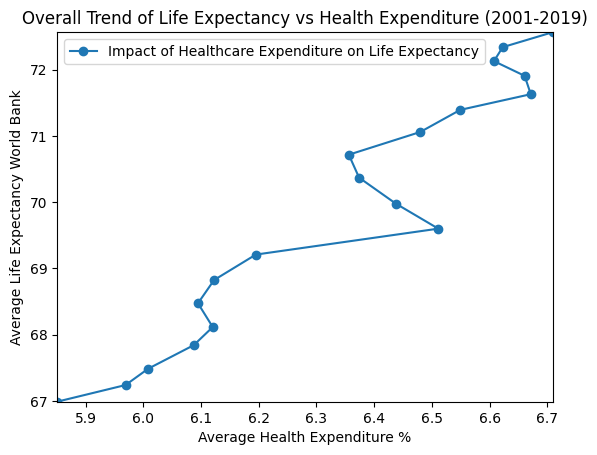

In [20]:
import matplotlib.pyplot as plt

# Filter data for the desired years (2001-2019)
filtered_df = imputed_df[imputed_df['Year'].between(2001, 2019)]

# Group data by year and calculate average Health Expenditure and Life Expectancy
average_data = filtered_df.groupby('Year')[['Health Expenditure %', 'Life Expectancy World Bank']].mean().reset_index()

# Create the line plot for average trend
plt.plot(average_data['Health Expenditure %'], average_data['Life Expectancy World Bank'], label='Impact of Healthcare Expenditure on Life Expectancy', marker='o')

# Set x and y axis limits
plt.xlim(min(average_data['Health Expenditure %']), max(average_data['Health Expenditure %']))
plt.ylim(min(average_data['Life Expectancy World Bank']), max(average_data['Life Expectancy World Bank']))

# Customize the chart
plt.xlabel('Average Health Expenditure %')
plt.ylabel('Average Life Expectancy World Bank')
plt.title('Overall Trend of Life Expectancy vs Health Expenditure (2001-2019)')
plt.legend()
plt.show()

#**Insight**

* Positive Trend: There's a clear upward trend in life expectancy as healthcare expenditure increases, suggesting a positive relationship.

* Non-Linearity: The relationship might not be perfectly linear. The initial increase in life expectancy seems steeper, possibly slowing down at higher expenditure levels. This suggests that increasing healthcare spending beyond a certain point may yield diminishing returns in terms of life expectancy.

* Outliers: There are a few outliers, particularly at higher expenditure levels, where life expectancy is lower than expected. These outliers could be due to various factors and warrant further investigation.

* Variation: Even within similar expenditure ranges, there's some variation in life expectancy. This indicates that other factors besides healthcare expenditure play a role.


In [21]:
bins = [0, 0.25, 0.5, 0.75, 1]  # Quantiles for 4 bins
labels = ['Low Spending', 'Moderate Spending', 'High Spending', 'Very High Spending']

imputed_df['SpendingCategory'] = pd.qcut(imputed_df['Health Expenditure %'], q=bins, labels=labels)

In [22]:
# New column created Spending Category which categorizes the healthcare expenditure.
imputed_df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,SpendingCategory
0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.0,5.892352,2.755304,10.809000,10.586521,2179727.10,9689193.70,5795426.38,Moderate Spending
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.0,4.483516,2.853790,4.004000,20.778259,1392080.71,11190210.53,2663516.34,Moderate Spending
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.0,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75,High Spending
3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,8.9,520.0,5.865939,3.868706,5.920000,21.788660,1697.99,695.56,13636.64,Moderate Spending
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.0,2.484370,3.432970,2.493000,62.299429,144678.14,65271.91,481740.70,Low Spending


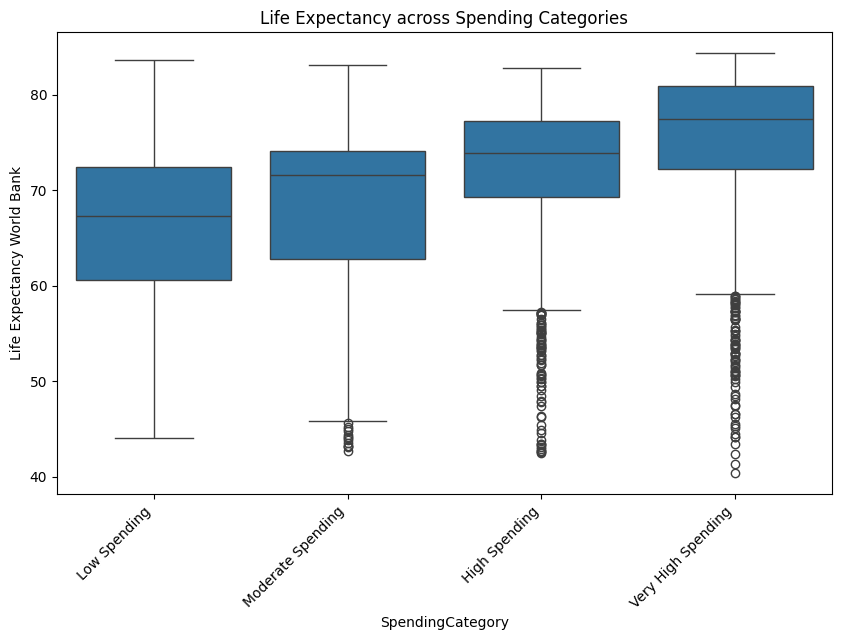

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='SpendingCategory', y='Life Expectancy World Bank', data=imputed_df)
plt.title('Life Expectancy across Spending Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#**Insight**

* Increasing Trend: Life expectancy generally increases as spending category moves from 'Low' to 'Very High'. This confirms the positive relationship observed earlier.

* Overlap: There's some overlap between categories, particularly between 'Moderate' and 'High' spending. This suggests that other factors beyond healthcare expenditure influence life expectancy.

* Outliers: Outliers are present in all categories, indicating that within each category, there's variability in life expectancy.

* Distribution: The distributions within each category are right-skewed, meaning there are more countries with lower life expectancy within each category.

#**Additional Observations**

* **'Very High' Spending:** The 'Very High' spending category has the widest range of life expectancy, suggesting that factors other than healthcare expenditure play a significant role at higher spending levels.

* Outliers in **'Very High' Spending:** The presence of outliers in the 'Very High' spending category is particularly noteworthy and warrants further investigation to understand the reasons behind the lower life expectancy.


In [24]:
spending_category_stats = imputed_df.groupby('SpendingCategory')['Life Expectancy World Bank'].agg(['mean', 'median'])
print(spending_category_stats)

                         mean     median
SpendingCategory                        
Low Spending        66.297575  67.273000
Moderate Spending   68.105382  71.559988
High Spending       71.466306  73.917817
Very High Spending  74.040198  77.492683


<ipython-input-24-1256e5e2ffdd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_category_stats = imputed_df.groupby('SpendingCategory')['Life Expectancy World Bank'].agg(['mean', 'median'])


In [26]:
afghanistan_data = imputed_df[imputed_df['Country Name'] == 'Afghanistan']
afghanistan_spending_stats = afghanistan_data.groupby('SpendingCategory')['Life Expectancy World Bank'].agg(['mean', 'median'])
print(afghanistan_spending_stats)

                         mean  median
SpendingCategory                     
Low Spending              NaN     NaN
Moderate Spending   56.308000  56.308
High Spending       62.054000  62.054
Very High Spending  61.023118  61.028


<ipython-input-26-c632b3d2825c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  afghanistan_spending_stats = afghanistan_data.groupby('SpendingCategory')['Life Expectancy World Bank'].agg(['mean', 'median'])


**Insight**

* **Missing Data:** There's no data for Afghanistan in the 'Low Spending' category. This means Afghanistan's healthcare expenditure has consistently been above the 'Low Spending' threshold during the analyzed period.

* **Life Expectancy Trend:** Life expectancy increases as spending moves from 'Moderate' to 'High', but then dips slightly for 'Very High' spending. This suggests that increasing healthcare expenditure has a positive impact on life expectancy in Afghanistan, but there might be diminishing returns or other factors at play at the highest spending levels.

* Mean vs. Median: The mean and median values are quite close for each category, indicating that the data is likely not heavily skewed within each category.

**Possible Explanations for the Dip in 'Very High' Spending:**

* Data Limitations: The dip might be due to limited data points in the 'Very High' spending category for Afghanistan.

* Other Factors: Other factors, such as political instability, conflict, or access to healthcare, could be influencing life expectancy in Afghanistan, even at higher spending levels.

* Time Lag: The impact of increased healthcare expenditure might have a time lag, and the 'Very High' spending could reflect recent increases that haven't yet translated into significant life expectancy gains.

# **4. Statistical Analysis**

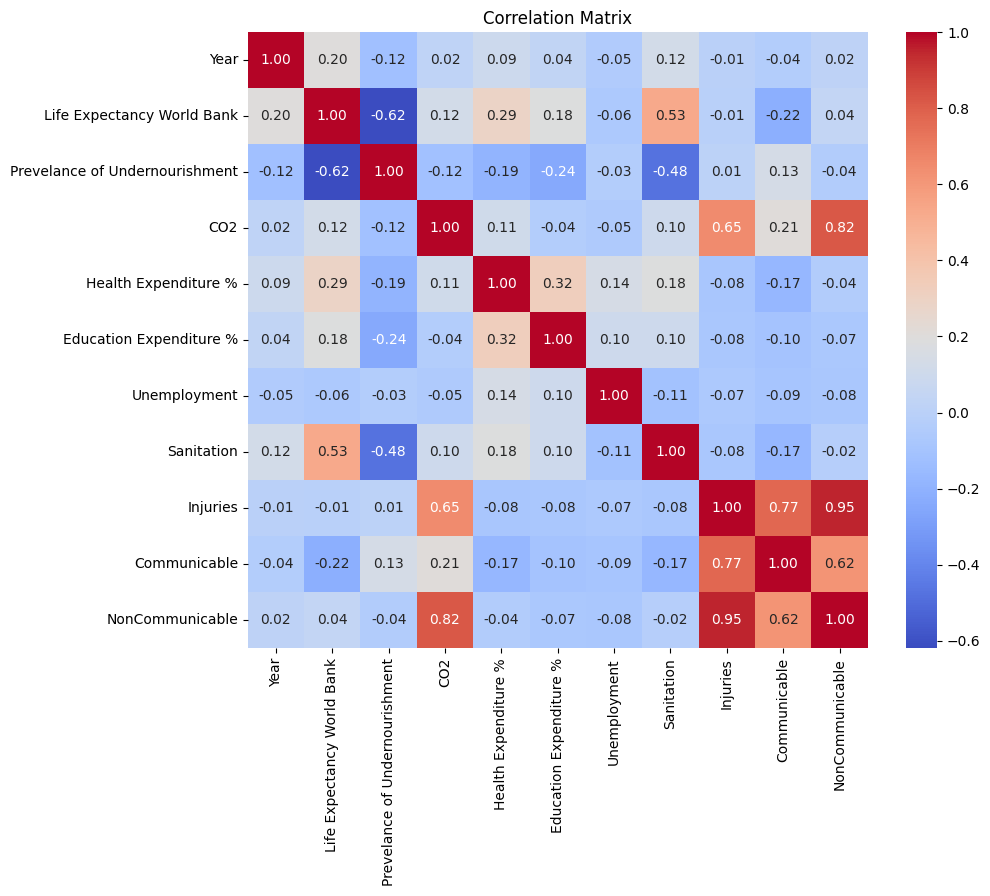

In [29]:
# Conducting a correlation analysis for my variables in the dataset
# Select only numerical features for correlation analysis
numerical_features = imputed_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Displaying results using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#**Insight**

## **Key Observations:**

1. **Strong Positive Correlations:**

* Life Expectancy World Bank has a strong positive correlation with Health Expenditure % (0.29) and Education Expenditure % (0.18). This suggests that higher spending on healthcare and education is associated with increased life expectancy.

* Sanitation has a moderate positive correlation with Life Expectancy World Bank (0.53). This indicates that better sanitation practices are linked to improved life expectancy.

* There are strong positive correlations between CO2 emissions and several variables, including Injuries (0.95), NonCommunicable (0.82), and Health Expenditure % (0.11). This suggests that higher CO2 emissions are associated with increased injuries, noncommunicable diseases, and healthcare spending.

2. **Strong Negative Correlations:**

* Prevelance of Undernourishment has strong negative correlations with Life Expectancy World Bank (-0.62), Health Expenditure % (-0.19), and Education Expenditure % (-0.24). This indicates that higher levels of undernourishment are associated with lower life expectancy, lower healthcare spending, and lower education expenditure.

* Sanitation has a strong negative correlation with Prevelance of Undernourishment (-0.48). This suggests that better sanitation practices are associated with lower levels of undernourishment.

3. **Other Notable Relationships:**

* There's a moderate positive correlation between Health Expenditure % and Education Expenditure % (0.32), suggesting that countries with higher healthcare spending also tend to invest more in education.

* Injuries have strong positive correlations with Communicable (0.77) and NonCommunicable (0.95) diseases, indicating a link between injuries and these types of diseases.

**Overall Analysis**:

* Life Expectancy: As expected, life expectancy is positively associated with healthcare expenditure and education, and negatively associated with undernourishment.

* Healthcare and Education: There's a moderate positive relationship between healthcare and education expenditure, suggesting that countries investing in one often invest in the other.

* Environmental Factors: CO2 emissions have complex relationships with various health outcomes, suggesting potential negative environmental impacts on health.

* Sanitation and Undernourishment: Better sanitation is associated with improved life expectancy and lower undernourishment, highlighting the importance of basic infrastructure for health.

# **Important Considerations:**

* Correlation does not imply causation: While the heatmap reveals associations between variables, it doesn't prove causality. Further analysis is needed to establish causal relationships.

* Multicollinearity: Some variables, such as Health Expenditure % and Education Expenditure %, have moderate correlations with each other. This can affect the interpretation of regression models and may require further consideration.






In [30]:
# Regression Analysis
!pip install statsmodels
import statsmodels.formula.api as smf
import pandas as pd

# Assuming your DataFrame is called 'imputed_df'

# Define the formula for the regression model
# LifeExpectancy is the dependent variable, and the others are independent variables
formula = 'Q("Life Expectancy World Bank") ~ Q("Health Expenditure %") + Q("Education Expenditure %") + CO2'

# Create and fit the regression model
model = smf.ols(formula, data=imputed_df).fit()

# Print the model summary
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Q("Life Expectancy World Bank")   R-squared:                       0.102
Model:                                         OLS   Adj. R-squared:                  0.101
Method:                              Least Squares   F-statistic:                     124.8
Date:                             Wed, 29 Jan 2025   Prob (F-statistic):           1.45e-76
Time:                                     20:23:47   Log-Likelihood:                -11833.
No. Observations:                             3306   AIC:                         2.367e+04
Df Residuals:                                 3302   BIC:                         2.370e+04
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                                   coef    std err          t      P>|t|      [0

In [37]:
# For better readability
!pip install statsmodels
!pip install stargazer

from IPython.display import HTML
import statsmodels.formula.api as smf
import pandas as pd
from stargazer.stargazer import Stargazer

# Assuming your DataFrame is called 'imputed_df'

# Define the formula for the regression model
formula = 'Q("Life Expectancy World Bank") ~ Q("Health Expenditure %") + Q("Education Expenditure %") + CO2'

# Create and fit the regression model
model = smf.ols(formula, data=imputed_df).fit()

# Create a Stargazer object
stargazer = Stargazer([model])

# Display the regression table using HTML for readability
HTML(stargazer.render_html())

#**Interpretation of the Regression Analysis**

**Key Findings:**

* Health Expenditure: A 1% increase in health expenditure (as % of GDP) is associated with a 0.800 unit increase in life expectancy, holding other factors constant. This effect is statistically significant (p<0.01).

* Education Expenditure: A 1% increase in education expenditure (as % of GDP) is associated with a 0.549 unit increase in life expectancy, holding other factors constant. This effect is also statistically significant (p<0.01).

* CO2 Emissions: A 1 unit increase in CO2 emissions is associated with a very small (0.000) but statistically significant (p<0.01) increase in life expectancy. This might seem counterintuitive, but it's important to remember that correlation doesn't equal causation, and this relationship could be influenced by other factors not included in the model.

* Model Fit: The R-squared value of 0.102 indicates that the model explains about 10.2% of the variation in life expectancy. This suggests that other factors not included in the model also play a significant role in determining life expectancy.


#**5. Time Series Analysis**

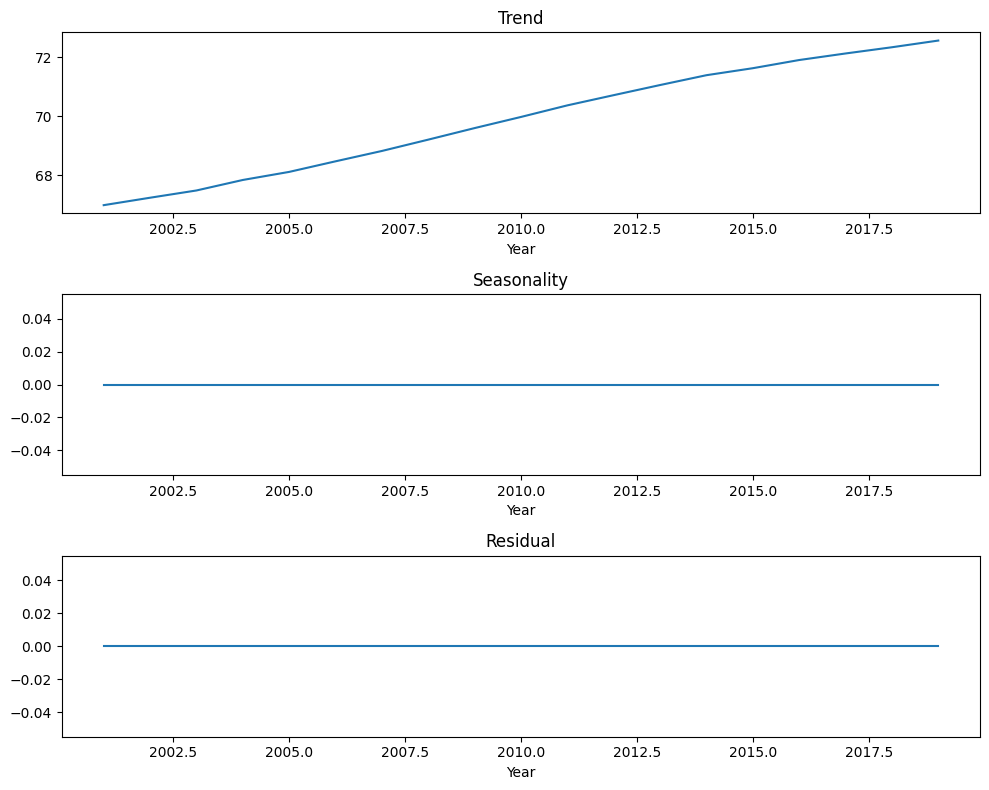

In [39]:
# Install/upgrade statsmodels for time series analysis
!pip install statsmodels --upgrade

# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Prepare the Time Series Data
life_expectancy_ts = imputed_df.groupby('Year')['Life Expectancy World Bank'].mean()
# Create a time series of average Life Expectancy by year

# Perform Decomposition
decomposition = seasonal_decompose(life_expectancy_ts, model='additive', period=1)
# Decompose the time series into trend, seasonality, and residual
# Assuming an annual seasonality (period=1)

# Plot the Decomposed Components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

decomposition.trend.plot(ax=ax1)  # Plot the trend component
ax1.set_title('Trend')

decomposition.seasonal.plot(ax=ax2)  # Plot the seasonal component
ax2.set_title('Seasonality')

decomposition.resid.plot(ax=ax3)  # Plot the residual component
ax3.set_title('Residual')

plt.tight_layout()
plt.show()
# Display the plots

#**Interpretation of the Time Series Trend Analysis**

# **1. Trend:**

* The trend component shows a clear upward trajectory in life expectancy over the years, indicating a long-term increase.

* This suggests that overall, life expectancy has been consistently improving.

# **2. Seasonality:**

* The seasonality component is relatively flat, indicating minimal seasonal variation in life expectancy.

* This means that life expectancy does not exhibit any significant fluctuations throughout the year.

# **3. Residuals:**

* The residuals appear to be random and centered around zero, suggesting that there's no significant underlying pattern left unexplained by the trend component.

# **Overall Interpretation**

* The analysis suggests that the primary driver of the increase in life expectancy over time is a long-term trend, rather than seasonal fluctuations.

* This finding is consistent with the earlier analysis that showed a positive relationship between life expectancy and various socio-economic factors, which likely contribute to the overall upward trend.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

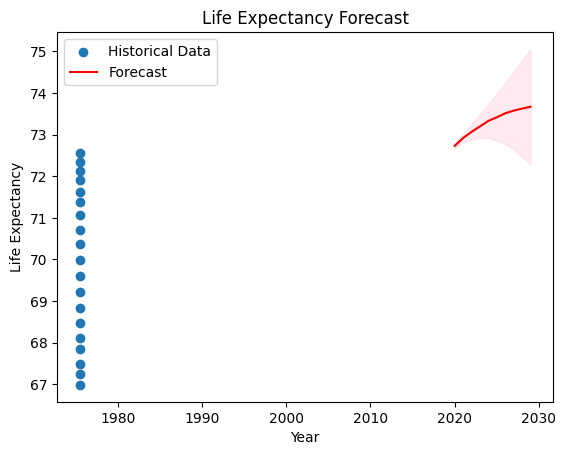

In [44]:
# Install/upgrade statsmodels for time series analysis!pip install statsmodels --upgrade

# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the Time Series Data
life_expectancy_ts = imputed_df.groupby('Year')['Life Expectancy World Bank'].mean()
# Create a time series of average Life Expectancy by year

# Fit the ARIMA Model
# (p, d, q) are the model orders - you might need to experiment to find the best values
model = ARIMA(life_expectancy_ts, order=(5, 1, 0))
model_fit = model.fit()

# Forecast Future Values
forecast_steps = 10  # Number of years to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Get the last year in the historical data
last_historical_year = life_expectancy_ts.index[-1]

# Generate the forecast years
forecast_years = pd.date_range(start=str(last_historical_year + 1), periods=forecast_steps, freq='AS')

# Plot the Historical Data as a scatter plot
plt.scatter(life_expectancy_ts.index, life_expectancy_ts, label='Historical Data')

# Plot the Forecast (line plot is fine for the forecast)
plt.plot(forecast_years, forecast_mean, label='Forecast', color='red')

# Fill the confidence intervals
plt.fill_between(forecast_years, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)

# Add title and labels
plt.title('Life Expectancy Forecast')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()

# Show the plot
plt.show()

#**Interpretation of the Life Expectancy Forecast:**

#**Overall Trend:**

* The forecast suggests that global average life expectancy is expected to continue increasing over the next 10 years (from 2019 to 2028).


* This is indicated by the red forecast line, which shows a gradual upward slope.

#**Historical Data:**

* The blue dots represent the average global life expectancy for each year from 2001 to 2019.

* While there's a general upward trend in the historical data, it's important to remember that these are yearly averages, and the plot doesn't show any within-year variations. (The reason for this is because the data is yearly, not montly or quartlery, hence no variation).

#**Confidence Intervals:**

* The shaded pink area around the forecast line represents the confidence intervals. This indicates the range within which the actual life expectancy is likely to fall with a certain degree of confidence (typically 95%).

* The width of the confidence intervals increases as we move further into the future, reflecting the increasing uncertainty of the forecast over longer time horizons.

#**Specific Predictions:**

* Based on the forecast, average global life expectancy is projected to reach around 73.5 years by 2028.

* The 95% confidence interval for this prediction ranges from approximately 72.5 to 74.5 years.

* This suggests a high probability that life expectancy will continue to improve, but the exact magnitude of the increase is uncertain.



In [45]:
# Export the updated DataFrame to a CSV file, overwriting the previous imputed file
imputed_df.to_csv('final_life_expectancy_dataset.csv', index=False)